These are the houses that couldn't be imported

- TJ1_036
  - AEL_P electrical data Folder
    - Divide house meter into 4 parts, allocate it to each apt
    - 4 seperate apts: apt_1 (inquiry #1), apt_2 (inquiry #2),apt_3 (inquiry #3), apt_4 (inquiry #4)
- **Omit** TJ1_045
- **Omit** TJ1_072
- **Omit** TJ1_145
- TJ1_146_apt (pdf)



# Setup

All analysis was done using Python version 3.6.9

In [ ]:
# Import python libraries
import pandas as pd
from datetime import datetime
import numpy as np
from pathlib import Path
from dataclasses import dataclass, field
from typing import List, Optional, Callable
from IPython.display import display
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


We have to mount the drive so that we can extract the data from google drive

In [ ]:
# mount google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Definitions

Created definitions to make processing each house easier and faster

## Unbin Dates

Since the data was collected based on AEL&P's billing period and not by calendar month, we have to "unbin" electrical consumption per date. This function allows us to calculate the number of days between each billing period, divided the electrical consumption by that number and equally allocated the resulting electrical consumption to each of those days.

In [ ]:
def unbin_by_dates(df: pd.DataFrame) -> pd.DataFrame: # ("->" should return a df)
  ranges = []
# created a for-loop for each row in the date column
  for i in range(df.shape[0]-1): # takes the entire number of rows of the first column ("[0]"") minus the last row ("-1")
      start_date = df['date'][i+1] # start date of each row, ("i+1") because (bc)
      end_date = df['date'][i] # end date of each row ("i") bc dates are in decending order

# made it into a list, used date_range function which returns the range of equally spaced time points
# reversed function used bc the dates are in decending order
# closed ='right' bc we want to include the end date in the list
      date_range = list(reversed(pd.date_range(start_date, end_date, closed='right')))
      y0 = df['kWh'][i] # for each row of kWh
      dx = (len(date_range)) # length of data_range list  
      if dx == 0: # if there is a date row empty, just continue down to the next row
        continue
      consumption_per_day = y0 / dx # take each kWh and divide by the number of days in between and including the start and end date
      uniform_consumption = [consumption_per_day]*dx # allocate that number^ to each day in date_range

# new df with original data_range dates and uniform_consumption, with column labels
      df2 = pd.DataFrame(zip(date_range, uniform_consumption), columns=['date', 'kWh']) 
      ranges.append(df2) # add each new df2's into empty list "ranges" (created in the begining of def)
  return pd.concat(ranges).reset_index(drop=True) # add each new ranges into one df and reset index

## Entry Functions

Some houses had different formats and therefore we created definitions to process them

In [ ]:
def id_func(x):
    return x

@dataclass(frozen=True)
class Entry:
    filename: str # path to file
    undesired_cols: List[int] = field(default_factory=list) # dropping columns
    data_op: Callable = id_func # calling if execl has entry functions
    name: Optional[str] = None # if excel needs a special name not similar to others
    sheet: Optional[int] = 0 # if we need to call different excel sheets
  
# For excel files that had to add two columns in order to get total kWh
def ONE_PLUS_TWO(input_df): 
    df = input_df.copy()
    df[3] = df[1] + df[2]
    df = df.drop(df.columns[[1,2]], axis=1)
    df = df[[0, 3, 4]]
    return df

# For excel files that had to double a column 
def TIMES_TWO(input_df):
    df = input_df.copy()
    df = df[[0, 1, 2]]
    df[2] = df[2] * 2
    return df

# For excel files that had the date in reverse order
def REVERSED(input_df):
    df = input_df.copy()
    return df.iloc[::-1]

# For excel files that had to drop the last (empty) row and reverse date order
def DROP_LAST_ROW_AND_REVERSE(input_df):
    df = input_df.copy()
    df = df[:-1]
    return df.iloc[::-1]

# For excel files that had to drop all empty rows
def DROP_KWH_NAN(input_df):
    df = input_df.copy()
    df = df[df[1].notna()]
    return df

# Import Datasets

Import each excel file from google drive as a list of entries, using the entry functions definitions

I removed the path to execl file because it had the addresses of each house

In [ ]:
entries: List[Entry] = [
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
       filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
        undesired_cols = [3,4,5,6,7],
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
        data_op = REVERSED,
    ),
    Entry(
        filename = "PATH_TO_FILE",
        undesired_cols = [1,2,4],
        data_op = DROP_LAST_ROW_AND_REVERSE,
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
        name = 'TJ1-010-3810',
    ),
    Entry(
        filename = "PATH_TO_FILE",
        name = 'TJ1-010-3812',
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE,
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
        undesired_cols = [1,2],
        name = 'TJ1-026-310',
    ),
    Entry(
        filename = "PATH_TO_FILE",
        name = 'TJ1-026-314',
    ),
    Entry(
        filename = "PATH_TO_FILE",
        name = 'TJ1-027',
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
        data_op = ONE_PLUS_TWO,
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    # Entry(
    #    filename = "PATH_TO_FILE",
    # ), # way too messy
    # TJ1-036
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
        undesired_cols = [1,2],
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    # Omit TJ1_045
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
        data_op = DROP_KWH_NAN
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
        data_op = REVERSED,
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
        data_op = REVERSED,
        sheet = 0,
        name = 'TJ1-060-house',
    ),
    Entry(
        filename = "PATH_TO_FILE",
        data_op = REVERSED,
        sheet = 1,
        name = 'TJ1-060-apt'
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    # Omitt TJ1_072    
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
        name = 'TJ1-075-909',
    ),
    Entry(
        filename = "PATH_TO_FILE",
        name = 'TJ1-075-911',
    ),
    Entry(
        filename = "PATH_TO_FILE",
        undesired_cols = [2,3],
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
        undesired_cols = [3,4,5,6,7,8,9,10,11,12,13,14,15,16],
        data_op = REVERSED,
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
        data_op = REVERSED,
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
        undesired_cols = [1,2],
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
        data_op = TIMES_TWO,
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
        undesired_cols = [2,3],
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
        sheet = 0,
        name = 'TJ1-134-apt',
    ),
    Entry(
        filename = "PATH_TO_FILE",
        sheet = 1,
        name = 'TJ1-134-house',
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
        undesired_cols = [1,2],
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    # Omitt TJ1_145
    Entry(
        filename = "PATH_TO_FILE",
        undesired_cols = [1,2,4],
        name = 'TJ1-146-house',
    ),
    # TJ1_146_apt (get from pdf)
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
    Entry(
        filename = "PATH_TO_FILE",
        undesired_cols = [3,4,5,6]
    ),
    Entry(
        filename = "PATH_TO_FILE",
    ),
]

# Testing

Testing to see what was different with certain excel files without having to open each one individually on google drive

In [ ]:
# calling with excel we needed to fix
#def FIX_146(input_df):
#    df = input_df.copy()
#    return df

In [ ]:
# looking at the difference between a good entry (aka entry one) compared to the bad entry
#entries: List[Entry] = [
#    Entry(
#        filename = "/content/gdrive/Shareddrives/Sites/Sites/TJ1-001 19146 Randall Rd. - Pearson/19146 Randall Rd.xlsx",
#        data_op = lambda x: print(x) or x,
#    ),
#    Entry(
#        filename = "/content/gdrive/Shareddrives/Sites/Sites/TJ1-146 3274 Pioneer Ave - Mitchell/3274 Pioneer Ave.xlsx",
#        undesired_cols = [1,2,4],
#    ),
#]

# Processing function

Processing each entry (aka house) in one function as a for loop

In [ ]:
dataframes = []
errors = []
for i,entry in enumerate(entries):
    try: 
        # display(entry.filename)
        # if entry.sheet is None:
        # df = pd.read_excel(entry.filename, header=None)
        # else:
        df = pd.read_excel(entry.filename, sheet_name=entry.sheet, header=None)
        
        df = entry.data_op(df)
        # display(df)
        
        df = df.drop(df.columns[entry.undesired_cols], axis=1) 
        # naming the columns
        if len(df.columns) == 2: # if excel had 2 columns, name this
            df.columns = ['date', 'kWh']
        else: # if not, name this
            df.columns = ['date', 'kWh', 'type']
        df = df[df['kWh'] != 0] # drop all kWh zeros  
        df = df.drop([0], errors='ignore')
        df = df.dropna(how='any', axis=1)
        df = df.reset_index(drop=True)

        unbined = unbin_by_dates(df) # daily kWh
        name = Path(entry.filename).parent.name[:7] if entry.name is None else entry.name # getting the name of the entry within the path of the file
        # rename = unbined.rename(columns={'kWh': entry.filename.split("/")[-2][:7]+".kwh"}) # associate kWh to df
        rename = unbined.rename(columns={'kWh': name+".kWh"}) # associate kWh to df
        date_index = rename.set_index("date") # set index as date
        monthly_kWh = date_index.resample('MS').sum() # get monthly kWh from daily kWh
        flitered = monthly_kWh.loc['2017-01-01':'2021-12-01'] # fliter for specific years
        dataframes.append(flitered) # put all dfs into one df
    except Exception as e: 
        print(e, entry.filename)
        display(df)
        errors.append((e,entry.filename, df))

# Errors
Print the length of errors, if any

In [ ]:
#print(len(errors))
#errors

# Concatenate All Dataframes

Get all dataframes into one cohesive dataframe

In [ ]:
# Getting all of them together using outer join, which combines dataframes based on index (aka date)
monthly_kWh = pd.concat(dataframes, axis=1, join='outer') 
# Resample monthly by year
yearly_sum = monthly_kWh.resample('Y').sum()

# Export Excel

Function on how to export dataframes as an excel file

In [ ]:
#from google.colab import files
#monthly_kWh.to_excel('monthly_kWh.xlsx') 
#files.download('monthly_kWh.xlsx')

# Exploratory data analysis

- Look at 2018-2019, compare to 2020
  - seasonality 
  - median/range
- average by annual, compare to 2020
- scatter plot of all averages
  - heat map of every house
  - line graph of highest, lowest and middle houses

In [ ]:
# descriptive statistics
monthly_kWh.describe()
yearly_sum.describe()

,TJ1-001.kWh,TJ1-002.kWh,TJ1-003.kWh,TJ1-004.kWh,TJ1-005.kWh,TJ1-006.kWh,TJ1-007.kWh,TJ1-008.kWh,TJ1-009.kWh,TJ1-010-3810.kWh,...,TJ1-155.kWh,TJ1-156.kWh,TJ1-157.kWh,TJ1-158.kWh,TJ1-159.kWh,TJ1-160.kWh,TJ1-161.kWh,TJ1-162.kWh,TJ1-163.kWh,TJ1-164.kWh
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,14627.666667,14187.150000,9047.266667,10641.882759,18141.880000,7508.440000,3618.553333,1862.150000,17235.850000,12070.772414,...,12830.900000,6196.125000,7116.187500,7937.225000,8679.073333,10641.882759,12070.772414,2286.000000,6670.853333,9438.787500
std,10550.865267,8273.614621,5073.608942,2119.909866,10171.847019,4538.932031,3263.390926,1343.658062,9819.596210,7035.130365,...,5275.942518,2157.551742,2281.956548,3274.518329,5063.567496,2119.909866,7035.130365,1553.885463,1906.734977,2333.038858
min,0.000000,0.000000,0.000000,8521.142857,0.000000,0.000000,0.000000,183.500000,0.000000,0.000000,...,3942.093750,2976.718750,4226.906250,2131.375000,0.000000,8521.142857,0.000000,0.000000,3327.600000,5692.718750
25%,11000.161290,14163.000000,10713.410282,8722.413793,21623.835632,7576.633333,202.129032,1301.532258,20376.100000,12603.172414,...,12767.576344,5897.512500,6372.125000,8907.741379,9538.375862,8722.413793,12603.172414,1472.000000,6899.894624,9494.681250
50%,13283.096774,17098.714286,11184.718750,10492.724138,22266.131034,7741.600000,5087.579167,1357.501075,20464.583333,13964.862069,...,14841.196573,5993.312500,6463.273118,9090.125000,9628.500000,10492.724138,13964.862069,2984.419355,7527.933333,9507.806897
75%,20943.804435,19508.561576,11568.558468,12030.689655,23181.233333,11090.987356,6097.348790,3046.625000,20513.701149,15920.399015,...,14854.133333,7280.993548,8183.345833,9522.758621,11116.266667,12030.689655,15920.399015,3040.548387,7675.238710,10482.886853
max,27911.270833,20165.474138,11769.645833,13442.443350,23638.200000,11132.979310,6705.709677,3421.591667,24824.865517,17865.428571,...,17749.500000,8832.087702,10335.287298,10034.125000,13112.224138,13442.443350,17865.428571,3933.032258,7923.600000,12015.843750


Plot each house's monthly kWh over time

Text(0.5, 1.0, 'Monthly Electric Consumption of Thermalize Juneau Residents')

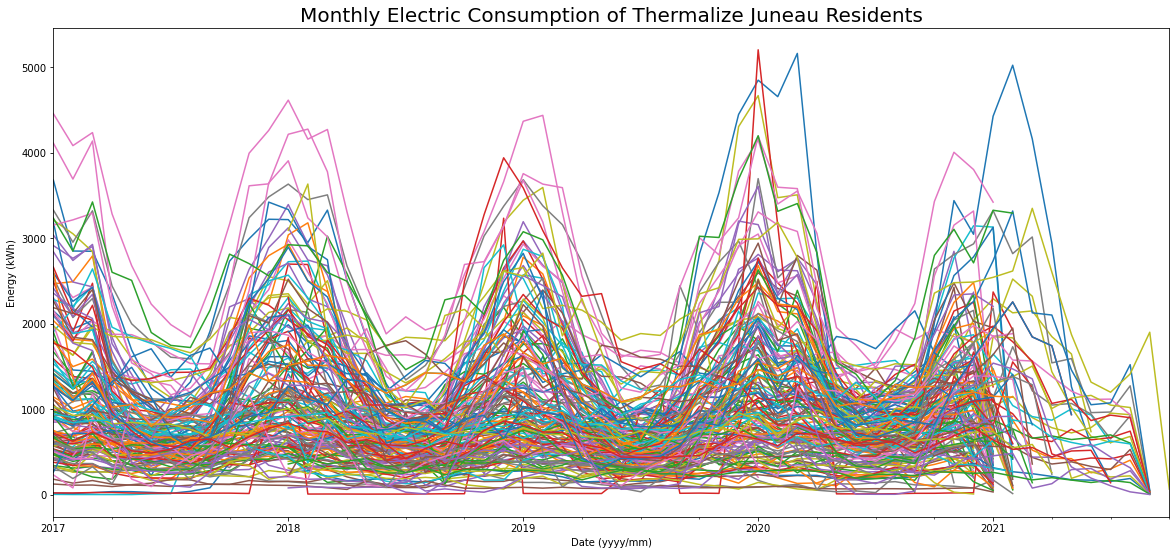

In [ ]:
from matplotlib import pyplot as plt
ax = monthly_kWh.plot(figsize=(20,9), legend=False)
ax.set_xlabel("Date (yyyy/mm)")
ax.set_ylabel("Energy (kWh)")
ax.set_title('Monthly Electric Consumption of Thermalize Juneau Residents',
             fontsize = 20)

Plot Monthly Five-Number Summary and Mean




In [ ]:
# Extract monthly max
max_monthly = pd.DataFrame(monthly_kWh.max(axis=1))
max_monthly.columns = ['max_kWh']
# Extract monthly 75% quantile
quant_75 = pd.DataFrame(monthly_kWh.quantile(0.75, axis=1))
quant_75.columns = ['quant_75_kWh']
# Extract monthly mean
mean_monthly = pd.DataFrame(monthly_kWh.mean(axis=1))
mean_monthly.columns = ['mean_kWh']
# Extract monthly 50% quantile (median)
median_monthly = pd.DataFrame(monthly_kWh.quantile(0.5, axis=1))
median_monthly.columns = ['median_kWh']
# Extract monthly 25% quantile
quant_25 = pd.DataFrame(monthly_kWh.quantile(0.25, axis=1))
quant_25.columns = ['quant_25_kWh']
# Extract monthly min
min_monthly = pd.DataFrame(monthly_kWh[monthly_kWh > .01].min(axis=1))
min_monthly.columns = ['min_kWh']

# Aggregate monthly 5 number summary and mean into one df
monthly = pd.concat([min_monthly, quant_25, median_monthly, mean_monthly, quant_75, max_monthly], axis=1)

# Plot monthly 5 number summary over time
fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthly.index,
    y=monthly["max_kWh"],
    name='Maximum'
))
fig.add_trace(go.Bar(
    x=monthly.index,
    y=monthly["quant_75_kWh"],
    name='75th Quartile'
))
fig.add_trace(go.Bar(
    x=monthly.index,
    y=monthly["mean_kWh"],
    name='Mean'
))
fig.add_trace(go.Bar(
    x=monthly.index,
    y=monthly["median_kWh"],
    name='Median'
))
fig.add_trace(go.Bar(
    x=monthly.index,
    y=monthly["quant_25_kWh"],
    name='25th Quartile'
))
fig.add_trace(go.Bar(
    x=monthly.index,
    y=monthly["min_kWh"],
    name='Minimum'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='Five-Number Summary of Monthly Electric Consumption',
                  xaxis_title='Date (yyyy/mm/dd)',
                  yaxis_title='Energy (kWh)',
                  xaxis_tickangle=-45)
fig.update_layout(barmode='group',width = 2000)
fig.show()

Plot Yearly Five-Number Summary and Mean


In [ ]:
# Extract yearly max
max_yearly = pd.DataFrame(yearly_sum.max(axis=1))
max_yearly.columns = ['max_kWh']
# Extract yearly 75% quantile
quant_75_yearly = pd.DataFrame(yearly_sum.quantile(0.75, axis=1))
quant_75_yearly.columns = ['quant_75_kWh']
# Extract yearly mean
mean_yearly = pd.DataFrame(yearly_sum.mean(axis=1))
mean_yearly.columns = ['mean_kWh']
# Extract yearly 50% quantile (median)
median_yearly = pd.DataFrame(yearly_sum.quantile(0.5, axis=1))
median_yearly.columns = ['median_kWh']
# Extract yearly 25% quantile
quant_25_yearly = pd.DataFrame(yearly_sum.quantile(0.25, axis=1))
quant_25_yearly.columns = ['quant_25_kWh']
# Extract yearly min
min_yearly = pd.DataFrame(yearly_sum[yearly_sum > .01].min(axis=1))
min_yearly.columns = ['min_kWh']

# Aggregate yearly 5 number summary and mean into one df
yearly = pd.concat([min_yearly,quant_25_yearly, median_yearly, mean_yearly,quant_75_yearly, max_yearly], axis=1)
yearly = yearly[:-1] # removes last row (empty)

# Plot yearly 5 number summary over time
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=yearly.index,
    y=yearly["max_kWh"],
    mode="lines",
    name='Maximum'
))
fig.add_trace(go.Scatter(
    x=yearly.index,
    y=yearly["quant_75_kWh"],
    mode="lines",
    name='75th Quantile'
))
fig.add_trace(go.Scatter(
    x=yearly.index,
    y=yearly["mean_kWh"],
    mode="lines",
    name='Mean'
))
fig.add_trace(go.Scatter(
    x=yearly.index,
    y=yearly["median_kWh"],
    mode="lines",
    name='Median'
))
fig.add_trace(go.Scatter(
    x=yearly.index,
    y=yearly["quant_25_kWh"],
    mode="lines",
    name='25th Quantile'
))
fig.add_trace(go.Scatter(
    x=yearly.index,
    y=yearly["min_kWh"],
    mode="lines",
    name='Minimum'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(title='Yearly Energy',
                  xaxis_title='Date (yyyy/mm/dd)',
                  yaxis_title='Energy (kWh)',
                  xaxis_tickangle=-45)
fig.update_layout(barmode='group')
fig.show()

In [ ]:
yearly # get numeric values

,min_kWh,quant_25_kWh,median_kWh,mean_kWh,quant_75_kWh,max_kWh
date,,,,,,
2017-12-31,1215.004435,5760.000000,8497.150862,10058.287530,13964.862069,38647.833333
2018-12-31,957.193548,6454.800000,9622.837963,11202.486133,15689.117241,35994.000000
2019-12-31,993.706897,6098.088172,9553.806452,10935.557082,15034.064516,32319.420507
2020-12-31,202.129032,7438.335832,10890.600985,11648.424395,15030.972917,34617.706340


In [ ]:
# get yearly sums
sum = pd.DataFrame(yearly.sum(axis=1))
sum.columns = ['sum_kWh']
sum

,sum_kWh
date,
2017-12-31,78143.138229
2018-12-31,79920.434886
2019-12-31,74934.643625
2020-12-31,79828.169501


In [ ]:
# see which houses had the max and min for each month
max_houses = pd.DataFrame(monthly_kWh.idxmax(axis=1))
max_houses.columns = ['House_ID_Max']
max_houses_values = pd.DataFrame(monthly_kWh.max(axis=1))
max_houses_values.columns = ['Max']
min_houses = pd.DataFrame(monthly_kWh.idxmin(axis=1))
min_houses.columns = ['House_ID_Min']
min_houses_values = pd.DataFrame(monthly_kWh.min(axis=1))
min_houses_values.columns = ['Min']

max_min_houses = pd.concat([max_houses,max_houses_values,min_houses,min_houses_values], axis=1)
# max_min_houses

In [ ]:
# see which houses had the max and min for each year
max_houses = pd.DataFrame(yearly_sum.idxmax(axis=1))
max_houses.columns = ['House_ID_Max']
max_houses_values = pd.DataFrame(yearly_sum.max(axis=1))
max_houses_values.columns = ['Max']
min_houses = pd.DataFrame(yearly_sum[yearly_sum > .01].idxmin(axis=1))
min_houses.columns = ['House_ID_Min']
min_houses_values = pd.DataFrame(yearly_sum[yearly_sum > .01].min(axis=1))
min_houses_values.columns = ['Min']

max_min_houses = pd.concat([max_houses,max_houses_values,min_houses,min_houses_values], axis=1)
# max_min_houses

# Median kWh
Used median values because the data was skewed

In [ ]:
# select only years 2017-2020 for median_monthly 
median_monthly = median_monthly.loc['2017-01-01':'2020-12-01']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



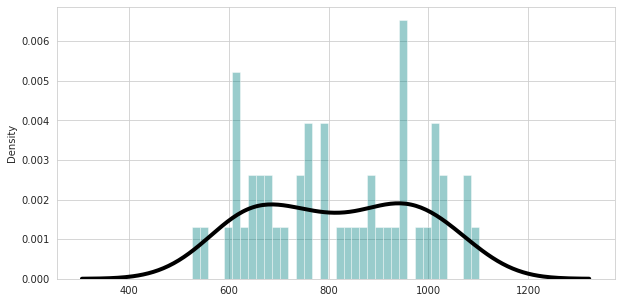

In [ ]:
# Density Plot and Histogram of median monthly values
sns.set_style("whitegrid")  # Setting style(Optional)
plt.figure(figsize = (10,5)) #Specify the size of figure we want(Optional)
sns.distplot(x = median_monthly["median_kWh"]  ,  bins = int(180/5) , kde = True , color = 'teal'\
             , kde_kws=dict(linewidth = 4 , color = 'black'))
plt.show()

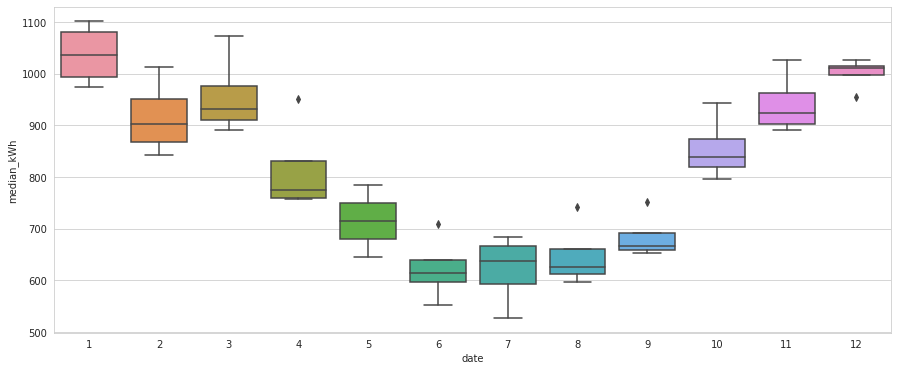

In [ ]:
# box plot of median monthly values
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(data = median_monthly, x=median_monthly.index.month, y='median_kWh', ax=ax)

# Decomposing Time-Series

Trend - Consistent upwards or downwards slope of a time series

Seasonal - Clear periodic pattern of a time series(like sine funtion)

Noise - Outliers or missing values



In [ ]:
# seasonal_decompose needs a dataframe with a datetime index
series = median_monthly[['median_kWh']]
frequency = 12 # used 12 bc there are 12 months in the year

# decomposing the time-series
decomposed = seasonal_decompose(series, model='additive', freq=frequency)
decomposed.observed['date_and_time'] = decomposed.observed.index
decomposed.trend['date_and_time'] = decomposed.trend.index
decomposed.seasonal['date_and_time'] = decomposed.seasonal.index
decomposed.resid['date_and_time'] = decomposed.resid.index

In [ ]:
# plot time series decomposition
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# make 4 subplots in one big graph
fig = make_subplots(
    rows=4, cols=1,
    subplot_titles=("Observed", "Trend", "Seasonality", "Residuals"))

# Add traces (or lines)
fig.add_trace(go.Scatter(x=decomposed.observed['date_and_time'], y=decomposed.observed['median_kWh'],
                         line=dict(width=1.5)), row=1, col=1)
fig.add_trace(go.Scatter(x=decomposed.trend['date_and_time'], y=decomposed.trend['median_kWh'], 
                         line=dict(width=2)), row=2, col=1)
fig.add_trace(go.Scatter(x=decomposed.seasonal['date_and_time'], y=decomposed.seasonal['median_kWh'],
                         line=dict(width=1.5)), row=3, col=1)
fig.add_trace(go.Scatter(x=decomposed.resid['date_and_time'], y=decomposed.resid['median_kWh'],
                         line=dict(width=1.5)), row=4, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="Year", row=1, col=1, showticklabels=True)
fig.update_xaxes(title_text="Year", row=2, col=1)
fig.update_xaxes(title_text="Year", row=3, col=1)
fig.update_xaxes(title_text="Year", row=4, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Energy (kWh)", row=1, col=1)
fig.update_yaxes(title_text="Energy (kWh)", row=2, col=1)
fig.update_yaxes(title_text="Energy (kWh)", row=3, col=1)
fig.update_yaxes(title_text="Energy (kWh)", row=4, col=1)

fig.update_layout(height=800, width=900,
                  title_text="Time Series Decomposition",
                  template="plotly_white",
                  showlegend=False)

fig.show()

- There is clearly an upward trend in the above plot.
- You can also see the uniform seasonal change.
- Non-uniform noise that represent outliers and missing values

# Date & Time Patterns

## Extracting Time Features

We can split up the date-timestamp column into its different components. This will allow us to find patterns for different groups



In [ ]:
# see: https://www.kaggle.com/robikscube/starter-hourly-energy-consumption
median_monthly['year'] = median_monthly.index.year
median_monthly['month'] = median_monthly.index.month
median_monthly['quarter'] = median_monthly.index.quarter
median_monthly['date'] = median_monthly.index.date 

# let's add the season number
median_monthly['season'] = median_monthly['month'].apply(lambda month_number: (month_number%12 + 3)//3)

## Plot kWh over Time

In [ ]:
# plotly doesn't allow us to access the index, so let's copy it into a column 
median_monthly['date_and_time'] = median_monthly.index

# plotting
fig = px.line(median_monthly,
              x='date_and_time',
              y='median_kWh',
              title=f'Levels of 24-Hour PM2.5 Average [{min(median_monthly.year)} - {max(median_monthly.year)}]')
fig.update_traces(line=dict(width=1))
fig.update_layout(xaxis_title='Date & Time (yyyy/mm/dd)',
                  yaxis_title='PM2.5 (ug/m3)')
fig.show()

## Yearly Seasonal Patterns

Season 1 = Winter

Season 2 = Spring

Season 3 = Summer

Season 4 = Fall

Max seasonal patterns using median 
data

In [ ]:
# aggregated data
#_ = median_monthly\
#    .groupby(['year', 'season'], as_index=False)\
#    .agg({'median_kWh':'max'})

# plotting
#fig = px.line(_, 
#              x='year', 
#              y='median_kWh', 
#              color='season', 
#              title='Max Yearly 24-Hour PM2.5 Average per Season')
#fig.update_layout(xaxis_title='Year',
#                  yaxis_title='PM2.5')
#fig.show()

Median seasonal patterns using median data

In [ ]:
# aggregated data
#_ = median_monthly\
#    .groupby(['year', 'season'], as_index=False)\
#    .agg({'median_kWh':'median'})

# plotting
#fig = px.line(_, 
#              x='year', 
#              y='median_kWh', 
#              color='season', 
#              title='Median Yearly 24-Hour PM2.5 Average per Season')
#fig.update_layout(xaxis_title='Year',
#                  yaxis_title='median_kWh')
#fig.show()

Mean seasonal patterns using median data

Used only mean for report for close to accurate interpretations 

In [ ]:
 
# aggregated data
_ = median_monthly\
    .groupby(['year', 'season'], as_index=False)\
    .agg({'median_kWh':'mean'})

# plotting
fig = px.line(_, 
              x='year', 
              y='median_kWh', 
              color='season', 
              title='Mean Yearly Electricity Consumption Average per Season')
fig.update_layout(xaxis_title='Year',
                  yaxis_title='Energy (kWh)')
fig.show()

## Yearly Quarterly Patterns

First quarter, Q1: 1 January – 31 March

Second quarter, Q2: 1 April – 30 June

Third quarter, Q3: 1 July – 30 September

Fourth quarter, Q4: 1 October – 31 December

Max quarterly patterns using median 
data

In [ ]:
# aggregated data
#_ = median_monthly\
#    .groupby(['year', 'quarter'], as_index=False)\
#    .agg({'median_kWh':'max'})

# plotting
#fig = px.line(_, 
#              x='year', 
#              y='median_kWh', 
#              color='quarter', 
#              title='Max Yearly 24-Hour PM2.5 Average per Quarter')
#fig.update_layout(xaxis_title='Year',
#                  yaxis_title='PM2.5')
#fig.show()

Median quarterly patterns using median 
data

In [ ]:
# aggregated data
#_ = median_monthly\
#    .groupby(['year', 'quarter'], as_index=False)\
#    .agg({'median_kWh':'median'})

# plotting
#fig = px.line(_, 
#              x='year', 
#              y='median_kWh', 
#              color='quarter', 
#              title='Median Yearly 24-Hour PM2.5 Average per Quarter')
#fig.update_layout(xaxis_title='Year',
#                  yaxis_title='PM2.5')
#fig.show()

Median quarterly patterns using median data

Used only mean for report for close to accurate interpretations 

In [ ]:
# aggregated data
_ = median_monthly\
    .groupby(['year', 'quarter'], as_index=False)\
    .agg({'median_kWh':'mean'})

# plotting
fig = px.line(_, 
              x='year', 
              y='median_kWh', 
              color='quarter', 
              title='Mean Yearly Electricity Consumption Average per Quarter')
fig.update_layout(xaxis_title='Year',
                  yaxis_title='Energy (kWh)')
fig.show()